In [2]:
import ROOT
from ROOT import larlite
from ROOT import TFile
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as smp
%matplotlib inline

In [101]:
f_s = TFile("dens_pi0_all_v2.root","READ")
f_t = TFile("dens_mu_all_v2.root","READ")

#V2 contains results from running first 3 python scriptfrom DC's area
n_rads = 20
rad_inc = 5

dens_all = [] 
hits_sh = []
hits_tr = []
rad_all  = [rad_inc*(i+1) for i in xrange(0,n_rads)]

s_evts = f_s.tree.GetEntries()
t_evts = f_t.tree.GetEntries()

print s_evts, t_evts
t_evts = s_evts

print "N radS : ", n_rads
for j in xrange(n_rads):
   
    for i in xrange(s_evts):
    
        getEvt = f_s.tree.GetEntry(i)
        hits_sh.append(f_s.tree.hits_per_r[j])  
        #dens_all.append(f_s.tree.density[j])
    
        getEvt = f_t.tree.GetEntry(i)
        hits_tr.append(f_t.tree.hits_per_r[j])  
    
    
#dens_all = np.array(dens_all).reshape(n_rads,f_s.tree.GetEntries())
#dens_all = [ i / np.cumsum(i)[-1] ]

hits_sh = np.array(hits_sh).reshape(n_rads,s_evts)
hit_sh_sum = [ np.cumsum(i)[-1] / s_evts for i in hits_sh]

hits_tr = np.array(hits_tr).reshape(n_rads,t_evts)
hit_tr_sum = [ np.cumsum(i)[-1] / t_evts for i in hits_tr]

4859 4912
N radS :  20


In [109]:
def displayData(hit_sh_v,hit_sh_sum_v,hit_tr_v,hit_tr_sum_v,rad,display_dim):

    bin_size = 80; min_edge = 0; max_edge = 1900
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    
    plt.figure(figsize=(30,30))
    for i in xrange(len(rad)-5):
        
        plt.subplot(display_dim,display_dim+1,i+1)
        plt.hist(hit_sh_v[i],bins=bin_list,facecolor='blue',alpha=0.5,
                 label="Average %.f Hits per Event"%hit_sh_sum_v[i])
        plt.hist(hit_tr_v[i],bins=bin_list,facecolor='red',alpha=0.5,
                 label="Average %.f Hits per Event"%hit_tr_sum_v[i])
        plt.title("Hit Distrib at Rad = %d [cm]"%rad[i],size=20)
        plt.xlabel("Number of Enclosed Hits")
        plt.ylabel("Counts")
        plt.legend()
        plt.yscale('log', nonposy='clip')
        plt.grid(True)
        #plt.xlim(0,500)
        #plt.xlim(0,900)
        
    plt.show()

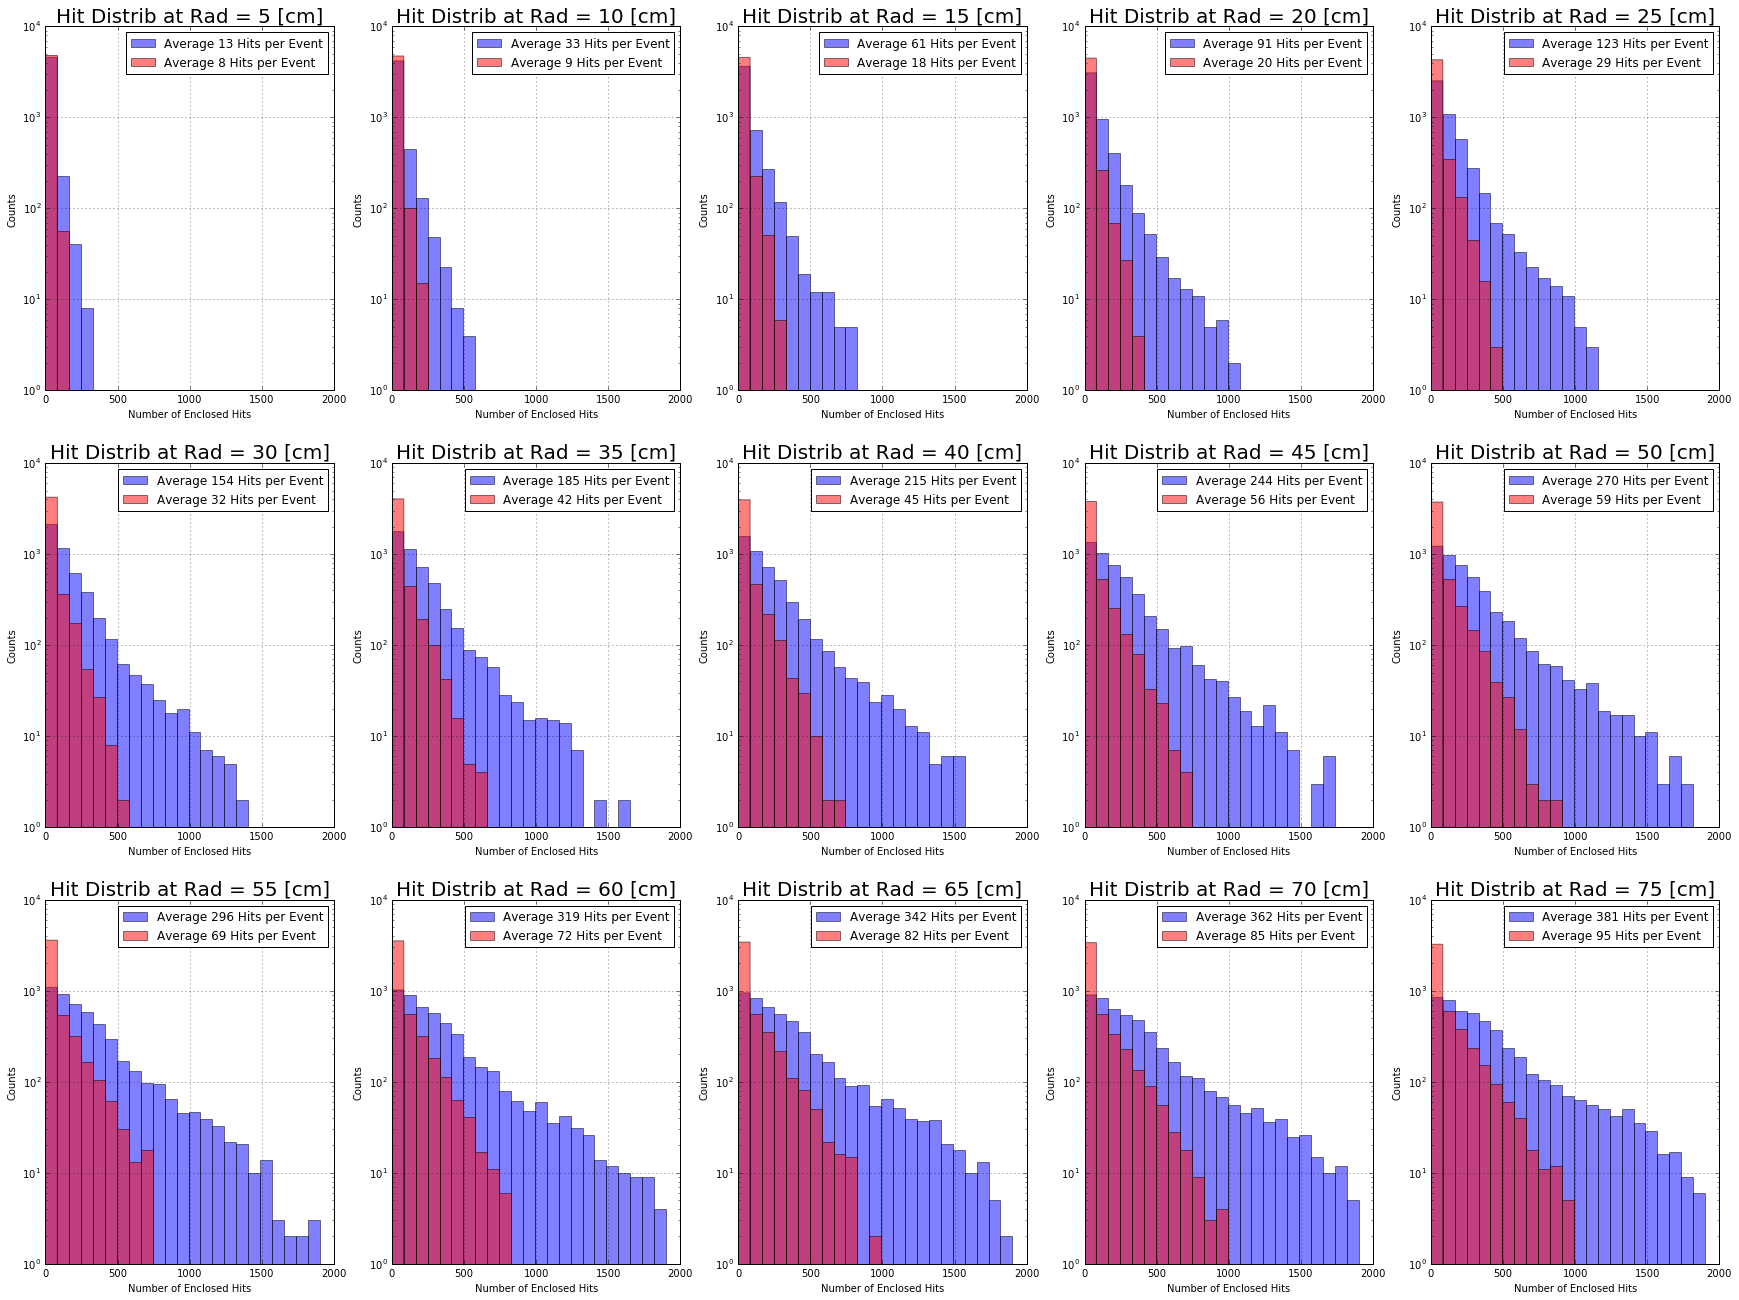

In [110]:
displayData(hits_sh,hit_sh_sum,hits_tr,hit_tr_sum,rad_all,4)

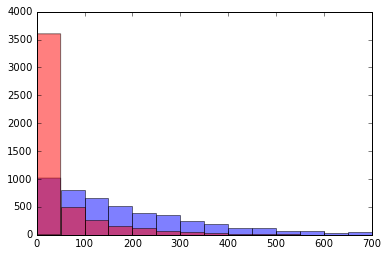

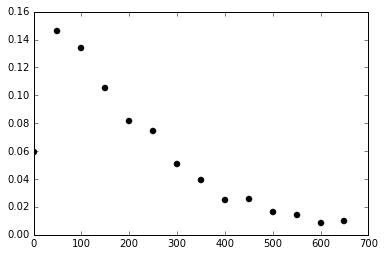

In [106]:
import math

it = 7

bin_size = 50; min_edge = 0; max_edge = 700
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

sig0, bins_s, _ = plt.hist(hits_sh[it],bins=bin_list,facecolor='blue',alpha=0.5,
                 label="Average %.f Hits per Event"%hit_sh_sum[it])
bkgd0, bins_b, _ = plt.hist(hits_tr[it],bins=bin_list,facecolor='red',alpha=0.5,
                 label="Average %.f Hits per Event"%hit_tr_sum[it])

#print sig0
#print bkgd0
#print bin_list
sig = [ float(sig0[i])/ np.cumsum(sig0)[-1] *float(sig0[i]) / math.sqrt(sig0[i]*sig0[i] + bkgd0[i]*bkgd0[i]) for i in xrange(len(sig0)) ]

#print len(bins_s[:-1]), len(sig)

plt.figure()
plt.plot(bins_s[:-1],sig,'ko')
plt.show()

1241 1241


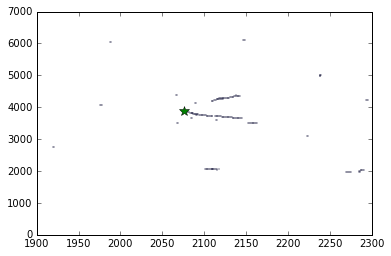

In [4]:
x= [202,203,446,446,446,446,521,521,525,526,527,528,529,530,530,531,531,532,533,530,531,532,533,534,532,529,530,531,531,532,532,533,533,534,534,532,534,535,533,534,535,531,683,684,685,686,687,688,689,690,691,692,857,858,859,858,860,859,860,861,862,863,923,924,923,924,912,913,914,915,916,915,916,917,918,919,920,991,992,1087,1088,1089,1173,1171,1172,1174,1175,1176,1177,1178,1202,1203,1204,1205,1206,1207,1208,1209,1210,1207,1208,1207,1208,1212,1213,1214,1215,1224,1227,1230,1231,1232,1233,1234,1235,1230,1231,1232,1233,1234,1235,1236,1316,1317,1320,1321,1322,1314,1315,1316,1317,1316,1317,1318,1318,1319,1319,1320,1321,1320,1319,1319,1322,1321,1315,1322,1323,1325,1326,1323,1324,1324,1323,1324,1323,1324,1325,1326,1327,1335,1336,1337,1335,1335,1336,1337,1337,1338,1338,1339,1340,1340,1339,1340,1341,1338,1341,1342,1339,1340,1343,1337,1338,1339,1340,1341,1342,1343,1340,1341,1357,1358,1358,1352,1353,1352,1353,1352,1353,1354,1355,1352,1353,1354,1353,1353,1354,1355,1354,1355,1356,1356,1354,1355,1356,1356,1359,1360,1361,1362,1357,1358,1357,1358,1359,1359,1360,1358,1356,1357,1358,1359,1359,1360,1360,1363,1364,1365,1366,1367,1368,1369,1355,1356,1357,1358,1358,1360,1364,1365,1366,1362,1363,1364,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1380,1381,1381,1381,1382,1381,1382,1381,1381,1382,1381,1381,1382,1385,1383,1384,1381,1381,1384,1382,1383,1385,1385,1407,1408,1461,1461,1462,1463,1463,1464,1467,1468,1504,1505,1509,1510,1513,1513,1514,1520,1521,1529,1530,1531,1532,1528,1529,1533,1531,1534,1530,1532,1533,1536,1534,1535,1532,1533,1552,1553,1554,1572,1573,1574,1575,1588,1589,1591,1591,1592,1593,1593,1594,1590,1599,1598,1608,1609,1609,1611,1612,1610,1676,1677,1685,1686,1687,1687,1688,1713,1714,1714,1715,1716,1714,1725,1726,1862,1863,1899,1900,1976,1977,1978,1988,1989,118,119,123,124,235,235,236,236,314,314,314,408,409,461,462,638,638,638,638,640,640,672,672,671,671,672,672,672,672,704,704,767,767,964,965,966,967,1020,1021,1022,1067,1068,1068,1069,1070,1071,1072,1073,1074,1078,1080,1105,1105,1102,1104,1105,1105,1227,1228,1238,1238,1238,1238,1240,1241,1242,1243,1245,1246,1243,1244,1244,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1278,1279,1274,1274,1283,1285,1293,1294,1295,1295,1296,1297,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1295,1295,1295,1295,1297,1298,1289,1290,1285,1283,1284,1287,1288,1288,1289,1289,1290,1290,1289,1291,1291,1291,1292,1293,1294,1295,1290,1290,1291,1291,1294,1291,1291,1292,1289,1290,1291,1292,1295,1295,1297,1299,1300,1302,1303,1303,1304,1305,1313,1314,1308,1309,1310,1315,1316,1317,1326,1327,1328,1328,1326,1326,1328,1328,1328,1326,1332,1333,1334,1345,1348,1360,1360,1365,1366,1367,1368,1378,1379,1380,1381,1382,1383,1377,1378,1395,1396,1413,1414,1407,1408,1409,1418,1419,1420,1421,1423,1424,1423,1424,1425,1426,1410,1411,1412,1413,1412,1413,1411,1412,1413,1402,1403,1403,1404,1404,1405,1402,1404,1405,1406,1406,1406,1404,1407,1408,1409,1405,1406,1407,1410,1414,1413,1413,1413,1413,1415,1416,1413,1414,1413,1415,1416,1416,1416,1410,1414,1410,1411,1410,1410,1411,1413,1412,1389,1390,1390,1391,1391,1388,1389,1391,1392,1389,1390,1391,1392,1393,1393,1394,1395,1396,1398,1399,1399,1398,1400,1400,1401,1401,1402,1403,1404,1404,1405,1405,1406,1407,1408,1409,1410,1411,1415,1417,1418,1419,1420,1421,1422,1417,1418,1419,1420,1421,1422,1417,1416,1416,1427,1428,1429,1426,1423,1424,1425,1427,1428,1429,1430,1428,1429,1430,1430,1430,1431,1430,1431,1431,1431,1431,1432,1433,1434,1430,1435,1436,1430,1431,1432,1433,1434,1435,1437,1438,1439,1440,1441,1442,1443,1444,1445,1444,1446,1445,1447,1448,1449,1450,1456,1457,1458,1465,1465,1466,1466,1466,1463,1465,1466,1456,1457,1458,1459,1460,1461,1462,1463,1463,1465,1465,1466,1466,1462,1463,1463,1464,1465,1466,1466,1462,1463,1466,1467,1467,1468,1461,1462,1463,1467,1468,1469,1469,1469,1470,1470,1471,1472,1471,1473,1474,1473,1475,1474,1475,1476,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1462,1463,1460,1461,1462,1463,1459,1464,1465,1465,1466,1462,1463,1466,1467,1468,1473,1474,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1487,1488,1489,1490,1497,1498,1499,1500,1501,1502,1503,1531,1533,1598,1599,1606,1607,1608,1606,1606,1611,1612,1613,1614,1626,1627,1629,1629,1652,1653,1667,1668,1669,1674,1675,1676,1677,1678,1679,1680,1681,1728,1728,1728,1728,1731,1731,1732,1731,1734,1728,1728,1729,1730,1731,1732,1733,1734,1728,1729,1730,1731,1732,1733,1734,1735,1728,1731,1728,1730,1730,1731,1731,1730,1731,1732,1735,1732,1728,1728,1728,1731,1731,1728,1728,1734,1734,1734,1741,1742,1774,1776,1777,1778,1779,1793,1794,1811,1813,1811,1813,1808,1809,1810,1808,1812,1803,1804,1805,1806,1806,1808,1809,1811,1809,1811,1813,1809,1811,1813,1809,1812,1814,1816,1824,1825,1826,1827,2067,2068,2149,2147,2148,48,49,322,323,660,661,781,782,1287,1288,1479,1480,1478,1479,1480,1541,1542,1544,1543,1539,1540,1540,1541,1540,1541,1542,1543,1543,1544,1574,1575,1695,1696,1700,1701,1702,1703,1690,1691,1692,1693,1694,1695,1696,1697,1698,1698,1699,1699,1700,1702,1704,1701,1705,1700,1706,1707,1707,1708,1709,1709,1749,1750,1751,1752,1853,1854,1920,1921,2068,2069,2084,2085,2082,2083,2084,2085,2080,2081,2086,2086,2087,2087,2088,2089,2089,2090,2091,2092,2090,2091,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2106,2103,2104,2105,2107,2108,2109,2110,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142,2145,2143,2144,2089,2090,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2110,2111,2111,2112,2113,2114,2115,2116,2118,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2117,2120,2118,2121,2119,2120,2121,2122,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139,2140,2141,2138,2142,2143,2114,2115,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2223,2224,2238,2239,2238,2239,2240,2270,2271,2272,2273,2274,2275,2285,2285,2286,2286,2287,2288,2289,2290,2291,2294,2295,2296,2306,2309,2307,2308,2310,2311,2620,2622,2621,2620,2767,2768]
y = [2370.7, 2369.85, 1924.52, 1942.45, 2686.86, 2668.29, 6151.54, 6167.67, 6162.2, 6161.38, 6160.21, 6159.19, 6158.07, 6156.88, 6096, 6089.03, 6101.03, 6094.93, 6095.29, 6112.44, 6110.21, 6104, 6108.19, 6094.09, 6111.79, 6136.72, 6137.44, 6122.55, 6137.55, 6123.85, 6137.5, 6124.5, 6135.69, 6114.7, 6127.31, 6154.13, 6136.43, 6129.1, 6152.52, 6150.66, 6148.17, 6155.6, 1148.51, 1151.83, 1157.54, 1163.12, 1166.76, 1169.09, 1168.03, 1165.77, 1160.24, 1157.48, 4199.18, 4197.48, 4197.83, 4213.58, 4197.61, 4214.1, 4217.68, 4222.07, 4226.17, 4232, 2572.71, 2572.05, 4500.89, 4497.52, 4456.46, 4457.66, 4459.02, 4460.26, 4460.5, 4474.1, 4475.75, 4478.28, 4483.94, 4484.36, 4483.42, 3345.81, 3346.13, 3251.66, 3248.19, 3246.8, 2006.35, 2017.31, 2010.68, 2001.77, 1999.1, 2000.51, 2002.15, 2000.38, 2022.11, 2020.23, 2018.18, 2016.43, 2016.23, 2016.05, 2013.09, 2011.71, 2014.07, 1967.32, 1968.1, 1977.96, 1984.98, 1964.11, 1960.37, 1959.21, 1955.93, 3088.08, 3081, 3689.46, 3691.52, 3692.06, 3693.26, 3693.05, 3693.44, 4995.78, 4995.78, 4995.31, 4992.2, 4984.44, 4976.94, 4974.9, 3097.69, 3098.39, 4317.64, 4323.39, 4328.04, 4263.72, 4268.17, 4252.64, 4251.99, 4274.31, 4273.25, 4271.38, 4246.14, 4240.95, 4260.98, 4255.01, 4250.04, 4229.05, 4273.6, 4287.12, 4243.8, 4223.21, 4292.25, 4216.93, 4225, 4195.37, 4191.49, 4209.1, 4201.29, 4230.82, 4243.2, 4240.48, 4332.79, 4335.29, 4336.7, 4337.86, 4337.67, 125.962, 127.258, 124.648, 144.203, 3284.11, 3287.75, 3286.51, 3299.05, 3289.23, 3300.19, 3288.09, 3282.56, 3292.09, 3309.52, 3310.06, 3284.19, 3317.78, 3297.3, 3295.71, 3323.4, 3323.2, 3292.7, 3486.44, 3486.8, 3486.05, 3486.48, 3488.37, 3493.96, 3497.99, 61.8278, 57.8762, 3695.27, 3673.26, 3691.81, 3814.39, 3815.36, 3720.19, 3720.64, 3737, 3736, 3710.86, 3705.56, 3753.13, 3753.21, 3750.67, 3770.42, 3787.67, 3774.51, 3778.02, 3795.25, 3794.83, 3783.19, 3798.21, 3815, 3817.99, 3817.89, 3700.08, 3667.65, 3662.7, 3660.33, 3659.82, 3755.32, 3754.5, 3795.52, 3796.57, 3791.63, 3807.51, 3796.77, 3814.47, 3830.43, 3832.01, 3832.68, 3819.65, 3832.91, 3812.07, 3827, 3660.16, 3661.09, 3662.04, 3662.99, 3661.9, 3657.23, 3653.24, 3867.69, 3869.01, 3873.4, 3877.03, 3897.25, 3905.12, 2731.57, 2731.65, 2730.43, 3594.68, 3596.12, 3596.71, 3915.05, 3919.65, 3923.89, 3929.03, 3933.31, 3938.2, 3943.42, 3947.62, 3952.96, 3957.56, 3961.26, 3966.12, 3970.7, 3974.24, 3978.66, 3981.31, 3980.89, 3975.79, 3969.58, 3965.5, 3962.75, 3960.78, 2574.18, 2574.48, 4102.08, 4118.53, 4122.57, 4129.9, 4137.51, 4140.65, 4151.62, 4148.95, 4159.87, 4171.54, 4174.56, 4158.67, 4180, 4182.09, 4180.98, 4193.46, 4199.2, 4200.01, 4200.79, 4178.95, 4192.5, 3036.77, 3036.18, 5249.96, 5264.46, 5251.41, 5241.88, 5220.93, 5220.66, 4132.27, 4132.55, 3932.85, 3933.6, 3931.94, 3932.03, 3933.85, 4399.54, 4399.05, 4287.74, 4287.31, 2029.15, 2032.89, 2036.46, 2040.98, 2046.78, 2048.51, 2041.85, 2053.82, 2043.24, 2053.87, 2055.49, 2057.36, 2045.51, 2055.43, 2050.35, 4109.55, 4104.13, 4228.45, 4229.21, 4229.64, 3473.49, 3469.55, 3467.8, 3468.04, 3185.83, 3184.9, 3175.46, 3195.82, 3176.4, 3174.21, 3151.3, 3151.4, 3204.42, 3082.67, 3089.03, 2938.78, 2918.14, 2933.43, 2900.85, 2885.85, 2917.82, 5233.49, 5233.49, 1973.1, 1973.27, 1973.05, 5957.4, 5955.9, 1099.65, 1096.91, 1107.96, 1103.94, 1102.68, 1119.67, 1857.59, 1857.18, 1073.09, 1070.96, 6100.78, 6101.61, 4055.77, 4057.66, 4057.2, 6051.24, 6051.05, 1127.81, 1128.2, 1190.49, 1190.52, 1160.51, 1168.75, 1157.14, 1171.32, 410.478, 422.147, 430.199, 2576.02, 2576.7, 3350.05, 3349.98, 4077.5, 4059.5, 5492.86, 5509.65, 2344.16, 2359.14, 3239.01, 3254.22, 3329.64, 3311.29, 3475.46, 3456.29, 5819.3, 5830.77, 5229.24, 5247.13, 1741.36, 1722.33, 6135.27, 6133.87, 6142.38, 6144.19, 1978.32, 1978.82, 1978.32, 6235.11, 6229.78, 6237.86, 6238.58, 6239.86, 6241.57, 6241.22, 6241.51, 6243, 6245.63, 6247.7, 5989.17, 6009.69, 6266.87, 6267.73, 6243.98, 6257.87, 2734.74, 2735.21, 2976, 2955.52, 3269, 3275.97, 5804.71, 5807.49, 5814.13, 5820.25, 5920.71, 5916.84, 5933.35, 5924.5, 5935.5, 5916.18, 5916.54, 5918.82, 5919.83, 5920.75, 5921.09, 5922.69, 5924.68, 5925.96, 5926.57, 5927.18, 5927.27, 5926.62, 2578.15, 2578.45, 4686.23, 4665.55, 6393, 6391, 4136.62, 4135.89, 1024.29, 1003.49, 2032.39, 2032.32, 2045.77, 2031.97, 2032.53, 2032.69, 2032.75, 2032.91, 2033.2, 2033.33, 2033.21, 2032.98, 2965.22, 2978.09, 5607.61, 5623, 6348.77, 6342, 6374.44, 6379.24, 6313.37, 6319.13, 6318.83, 6301.14, 6295.58, 6309.26, 6293.09, 6305.99, 6289.83, 6310, 6326, 6295, 6308.68, 6325.46, 6295.76, 6298.35, 6292.75, 6301.41, 6329.94, 6346.6, 6346.73, 6358.54, 6366, 6368.1, 6377.82, 6377.91, 6391, 6396.44, 6395.52, 6395, 6364.83, 6395, 6368, 6317.84, 6303.92, 6309, 6309.61, 6319, 3512.99, 3513.02, 2035.99, 2034.89, 5850.28, 5850.62, 5851.06, 3696.81, 3697.09, 3696.62, 5968.76, 5975.75, 5962.27, 5974.57, 5990, 6005.15, 5994.61, 6003.49, 6014.76, 6018, 3252.33, 3249.96, 3248.53, 2039.1, 2039.51, 55.2403, 67.8895, 2042.28, 2043.28, 2042.23, 2042.61, 2040.5, 2039.34, 2040.6, 2042.29, 2044.14, 2045.49, 4905.47, 4905.13, 3839.48, 3835.44, 4233.25, 4233.02, 5859.39, 5860.02, 5860.77, 2045.62, 2046.65, 2047.84, 2047.14, 3600.48, 3599.4, 3731.79, 3729.34, 3727.08, 3725.85, 3863, 3867.18, 3840, 3827.02, 3856.75, 3843.65, 3767.33, 3763.76, 3760.78, 3802.12, 3793.64, 3802.17, 3786.72, 3795.8, 3785.21, 3819.89, 3759.16, 3760.02, 3761.98, 3775.02, 3786.06, 3818.68, 3781.98, 3779.14, 3774.77, 3820.03, 3820.06, 3817.78, 3770.9, 3757.4, 3708, 3714.85, 3724.59, 3741.54, 3755.11, 3752.63, 3789, 3809.11, 3807.15, 3810.35, 3819.29, 3803.74, 3838.36, 3880, 3886.94, 3890.84, 3889.22, 3898.02, 3907, 3905, 3898.74, 3910.81, 3905.43, 3909.13, 3870.93, 3866.33, 3893, 3919.29, 3921.54, 3913.59, 3919.42, 3929.18, 3932.77, 3936.18, 3937.76, 3923.98, 3937.97, 3937.86, 3938.32, 3938.05, 3937.1, 3934.14, 3956.43, 3954.97, 3930.02, 3941.12, 3928.79, 3939.23, 3930.01, 3931.23, 3933.75, 3946.45, 3932.45, 3947.71, 3927.37, 3926.08, 3924.97, 3923.77, 3921.53, 3918.35, 3872.78, 3750.22, 3746.36, 3743.29, 3740.47, 3736.79, 3734.39, 3798.58, 3793.01, 3789.19, 3785.28, 3780.11, 3776.36, 3839.36, 3857.1, 3866.75, 3725.26, 3721.73, 3720.66, 3768.07, 3773.34, 3771.53, 3769.88, 3766.17, 3763.67, 3761.2, 3719.1, 3692.88, 3692.76, 3665, 3680.94, 3694, 3682.8, 3704.21, 3697.58, 3665.65, 3716.97, 3731.54, 3714.51, 3712.21, 3710.69, 3744.81, 3709.77, 3708.53, 3758.91, 3750.21, 3749.02, 3748.29, 3748.07, 3748.14, 3706.92, 3704.67, 3703.07, 3702.01, 3699.37, 3696.93, 3694.49, 3689.79, 3685.1, 3671.28, 3676.17, 3670.93, 3667.92, 3666.17, 3665.52, 3662.8, 2052.46, 2052.77, 2051.21, 4145, 4158.78, 4139.34, 4150.51, 4161.66, 4164.27, 4175.21, 4176.87, 4193.85, 4195.2, 4198.95, 4203.36, 4207.22, 4211.94, 4194.75, 4179.04, 4184.47, 4186.43, 4201.49, 4187.1, 4201.68, 4217.85, 4222.15, 4234.22, 4233.45, 4230.9, 4216.47, 4230.03, 4249.91, 4248.06, 4248.34, 4216.21, 4235.3, 4238.14, 4270.62, 4266.48, 4266.1, 4252.33, 4253.21, 4243.13, 4254.26, 4263.06, 4247.78, 4264.73, 4250.75, 4254.01, 4268.92, 4257.27, 4259.67, 4276.61, 4264.12, 4278.65, 4280.9, 4280.46, 4268.57, 4277.02, 4276.79, 4276.92, 4279.68, 4285.45, 4295.33, 4303.77, 4319.07, 4327.93, 4334.25, 4339.91, 4341.25, 4340.94, 4461.67, 4462.01, 4436.16, 4438.2, 4437.71, 4435.64, 4416.14, 4432.08, 4405.08, 4420.68, 4416.7, 4480.29, 4479.23, 4489.97, 4490.59, 4490, 2051.87, 2052.37, 3508.42, 3505.45, 3502.68, 3501.03, 3499.09, 3497.5, 3494.87, 3493.47, 3493.1, 3492.13, 3490.74, 3489.3, 3489.78, 3490.54, 3491.16, 3492.13, 2051.79, 2052.92, 2054.2, 2054.1, 2067.51, 2068.89, 2068.38, 2061.24, 2055.95, 2053.68, 2052.94, 2048.65, 2048.19, 6047.86, 6049.09, 2046.87, 2047.24, 2047.06, 6101.06, 6117.79, 1258.73, 1260.98, 1263.93, 1265.52, 2047.84, 2047.64, 4398.5, 4378.6, 2046.12, 2046.66, 1829.35, 1829.94, 1830.42, 4977.98, 4979.28, 4981.73, 4985.48, 4993.42, 4998.82, 5000.67, 5000.56, 21.4019, 37.8552, 539.466, 557.159, 556.25, 568.433, 550.607, 583.33, 597.382, 1423, 1438, 1961.13, 1964.63, 1965.79, 1966.48, 1968.51, 1970.09, 2043.7, 2043.99, 2043.05, 2042.7, 2040.74, 2040.33, 2041.26, 2042.41, 2158.01, 2160.96, 2098.03, 2085, 2097.54, 2090.71, 2117.34, 2123.92, 2127.45, 3994.44, 3995.35, 4015, 4246.38, 4258.66, 4270.63, 4423.6, 4438, 5313, 5330.34, 783.928, 803, 810.819, 2038.7, 2038.94, 2034.91, 2037.17, 2036.59, 2036.73, 2036.82, 2034.81, 2034.59, 805.429, 812.258, 868.019, 874.635, 2042.81, 2030.54, 2031.32, 2058, 2032.05, 2005.82, 2007.19, 2008.73, 2003.94, 2018.91, 1975.33, 2482.47, 2487.22, 2506.55, 2587.17, 2586.25, 4435.89, 4436.1, 4436.06, 4486.88, 4487.11, 6335.3, 6335.54, 2032.38, 2032.99, 2033.86, 2035.21, 4383.45, 4383.26, 6101.76, 6106.05, 6104.67, 3348.05, 3349.45, 5214.62, 5215.83, 2579.24, 2579.24, 3353.69, 3353.34, 2572.97, 2573.05, 1302.82, 1302.11, 5760.46, 5769.28, 5771.72, 5912.09, 5900.87, 5875.07, 5888.57, 5952.88, 5925.48, 5944.62, 5933.92, 5963.48, 5967.47, 5971.35, 5976.28, 5993.93, 5986, 3889.15, 3886.94, 4509.58, 4506.9, 4462.73, 4475.13, 4460.5, 4461.99, 4405.97, 4407.78, 4411.77, 4416.88, 4421.63, 4428.77, 4434.38, 4438.1, 4419.45, 4440.34, 4419.5, 4442.25, 4441.7, 4485.6, 4463.64, 4492.81, 4465.36, 4494.72, 4467.11, 4467.45, 4483.01, 4483.34, 4482.86, 4494.81, 3259.43, 3255.12, 3252.06, 3253.46, 4797.02, 4798.45, 2738.41, 2739.49, 3518.02, 3517.84, 3675.69, 3676.27, 3836.55, 3830.62, 3823.71, 3819.05, 3845.6, 3841.83, 3823.32, 3807.21, 3822.67, 3801.96, 3794.2, 3795.38, 3783.58, 3787.68, 3786.1, 3781.17, 3766.07, 3763.74, 3776.19, 3770.7, 3765.89, 3762.53, 3759.9, 3757.22, 3754.28, 3750.72, 3747.63, 3743.47, 3732.77, 3740.05, 3737.47, 3734.88, 3730.16, 3726.94, 3726.38, 3725.12, 3721.02, 3719.36, 3718.05, 3716.01, 3715.63, 3714.29, 3713.15, 3712.22, 3710.06, 3708.59, 3707.66, 3706.4, 3705.1, 3702.41, 3700.85, 3696.72, 3692.97, 3689.84, 3686.39, 3682.98, 3679.18, 3676.42, 3673.41, 3670.51, 3668.74, 3668.84, 3668.83, 3669.61, 3670.97, 3672.41, 3661.13, 3670.16, 3663.35, 4141.71, 4141.9, 2065.8, 2065.17, 2063.23, 2062.81, 2062.9, 2064.33, 2066.13, 2066.15, 2065.39, 2063.39, 2049.87, 2052.21, 2061.04, 2056.01, 2053.42, 2050.91, 2048.73, 2045.7, 2056.48, 4199.18, 4203.04, 4209.96, 4216.54, 4226.25, 4235.54, 4248.03, 4255.72, 4257.42, 4264.14, 4264.12, 4272.8, 4266.98, 4281.45, 4271.74, 4284.71, 4287.3, 4285.43, 4273.94, 4282.46, 4279.66, 4281.41, 4282.42, 4282.98, 4287.31, 4291.79, 4297.37, 4304.41, 4312, 4321.52, 4328, 4332.24, 4334.89, 4337.4, 4340.98, 4343.16, 4343.71, 4344.51, 4346.19, 4368.83, 4346.7, 4344.78, 3605.16, 3605.29, 3513.88, 3510.03, 3507.16, 3504.89, 3503.23, 3499.52, 3497.45, 3494.69, 3494.51, 3495.24, 3495.98, 3106.8, 3105.97, 4984.08, 4987.23, 5004.02, 5003.34, 5002.99, 1962.69, 1967.75, 1968.6, 1969.79, 1972.71, 1975.34, 1978.33, 1992.3, 1977.34, 2007.86, 2020.66, 2024.13, 2025.21, 2025.18, 2029.79, 4236.04, 4236.87, 4237.22, 2016.82, 2011.44, 2007.81, 2009.46, 2009.5, 2007, 1104.96, 1110.44, 1113.67, 1123.74, 1078.74, 1085.7]
#x = x[:len(y)]
print len(y), len(x)

v = [2076.52,3078.49+800]

plt.plot(x,y,'bo',markersize=0.5)
plt.plot(v[0],v[1],'g*',markersize=10)

plt.xlim(1900,2300)
plt.show()